## This is the Maxwell part of the system, how to compute the density and then the potential, to finally compute the electric field.

In [149]:
using Plots
using FFTW
FFTW.set_provider!("mkl")
using LinearAlgebra


In [160]:
include("aux_functions.jl")

differentials

We try a density and compute the potential. Then check it is working

In [161]:
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x) + 3. * cos.(κ*4*ω*x)
ϕe = -(κ *ω )^(-2)*(sin.(κ*ω*x) + 3.0/4/4 * cos.(κ*4*ω*x))
u = zeros(J)
ϕ = get_ϕ!(u,v,κ);
ϕ_D = get_ϕ_D!(u,v,(0.0,L))

128-element Vector{Float64}:
 -0.0017097949739642015
 -0.003165624740749358
 -0.0036443125713535953
 -0.004446941594192041
 -0.006373086054772531
 -0.00891941677427069
 -0.010654641081664565
 -0.010441850697993462
 -0.008424771099927458
 -0.00590273183788614
  ⋮
  0.00874601696612454
  0.008424771099927768
  0.007598565569755655
  0.007495351919192031
  0.008252287870166445
  0.008791101295830763
  0.007800825080135966
  0.004952932989908649
  0.001265802356547504

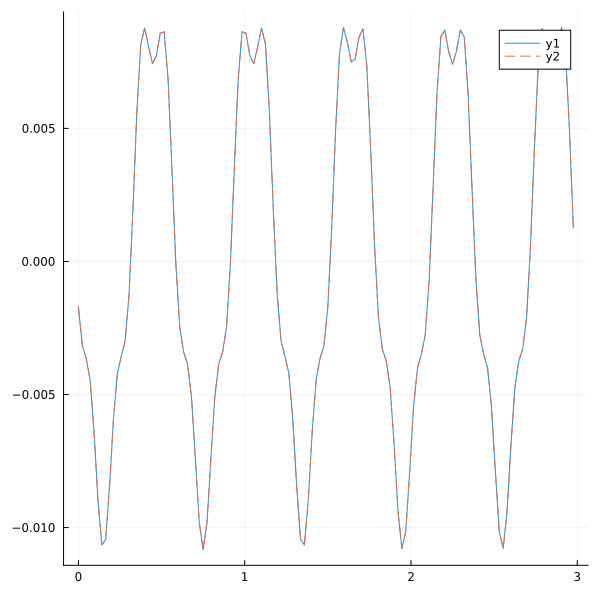

In [162]:
plot(x,ϕ_D)
plot!(x,ϕe ,ls=:dash)

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191


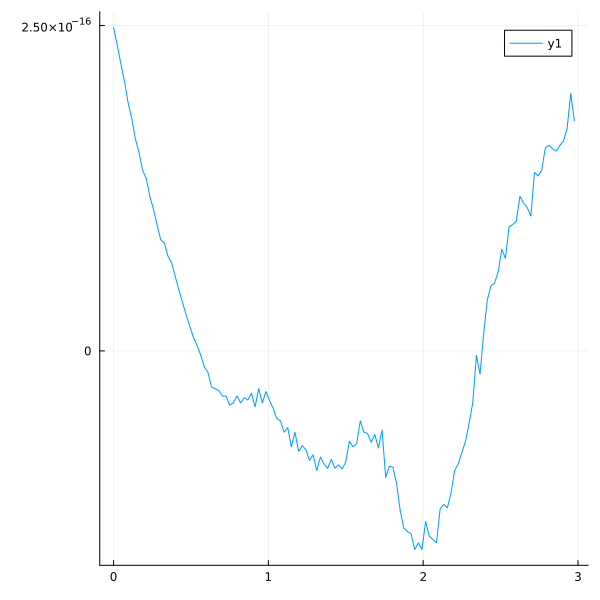

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/bZEEj/src/ticks.jl:191


In [163]:
plot(x, ϕ_D - ϕe)

Finally we check that the Electric field is computed correctly.

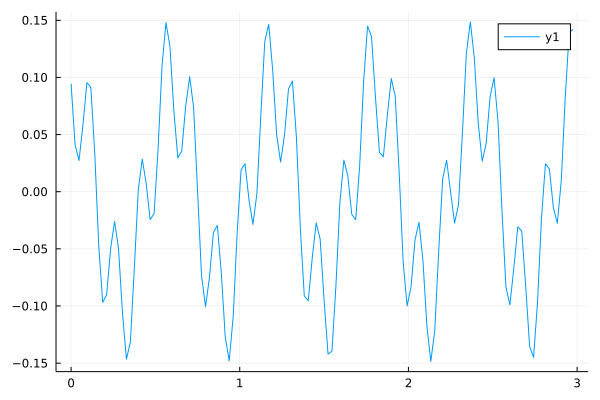

In [28]:
E = zeros(J)
Electric!(ϕ, E, dx)
plot(x,E)

### 2D check

κ = [6.283185307179586, 3.141592653589793]
k = [2, 2] .* κ = [12.566370614359172, 6.283185307179586]
k' * k = 197.39208802178717


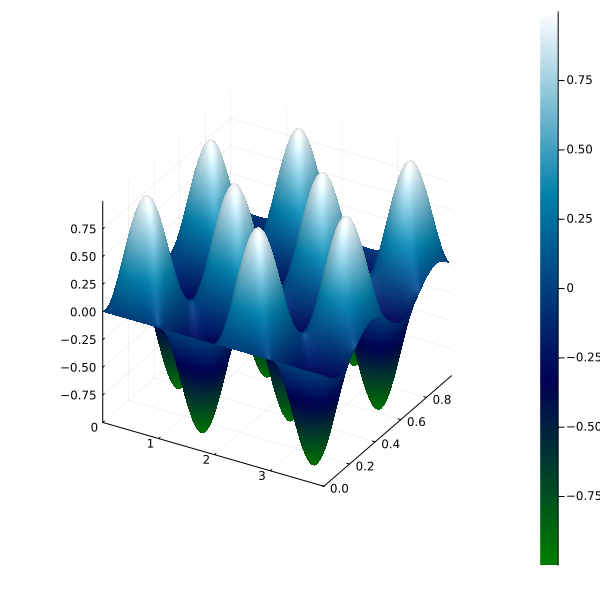

In [144]:
include("aux_functions.jl")

J = (200,100)
Box = (0.0,1.0,0.0,2.0)
x = Box[1]:0.01:Box[2]
y = Box[3]:0.01:Box[4]

ρ = Array{Float64,2}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]

@show κ
@show k = [2,2].*κ

@show k'*k

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ρ[i,j] = sin(k[2]*(j-1)*dx[2])
    end
end

ϕe = similar(ρ)

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ϕe[i,j] = -k[2]^(-2)*sin(k[2]*(j-1)*dx[2])
        ϕe[i,j] = -(k[1]^2 + k[2]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
    end
end

ϕ = similar(ρ)

#plot_matrix(ρ)

surface(y[1:end],x[1:end],ρ)

#plot(x,ρ[:,25])
#length(x)

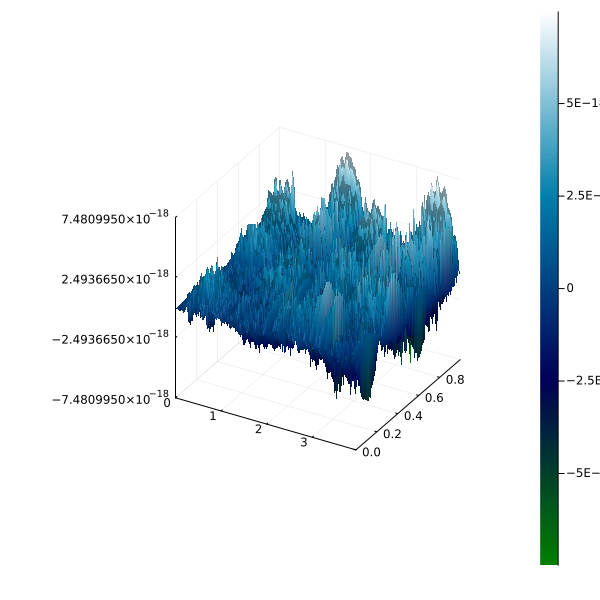

In [155]:
include("aux_functions.jl")
get_ϕ_D!(ϕ, ρ, Box)

#plot_matrix(ϕ)

surface(y,x,ϕ-ϕe)
#surface!(y,x,ϕe)
#plot(y,ϕ[45,:])
#plot!(y,ϕe[45,:], ls=:dash)

In [154]:
maximum(ϕ)*(k'*k)

0.9980267284282714

In [151]:
norm(ϕ - ϕe)

2.337600418806863e-16

### D = 3 Check

dx = (Box_array[2:2:end] - Box_array[1:2:end - 1]) ./ J = [0.005, 0.02, 0.01]
κ = 

[6.283185307179586, 3.141592653589793, 2.0943951023931953]
kv = [2, 2, 4] .* κ = [12.566370614359172, 6.283185307179586, 8.377580409572781]
kv' * kv = 267.5759415406448


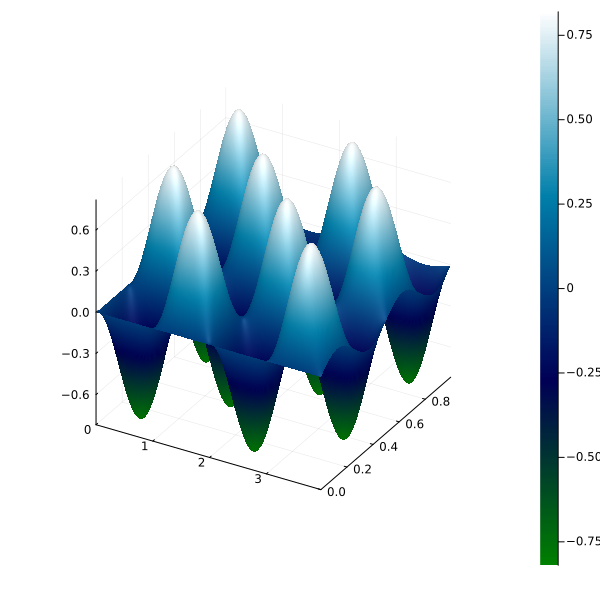

In [187]:
include("aux_functions.jl")

J = (200,100,300)
Box = (0.0,1.0,0.0,2.0,1.0,4.0)

ρ = Array{Float64,3}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

@show dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]
z = [Box[5] + (i-1)*dx[3]*(Box[6]-Box[5]) for i in 1:J[3]]

@show κ
@show kv = [2,2,4].*κ

@show kv'*kv

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        for k in 1:J[3]
            ρ[i,j,k] = sin(kv[1]*(i-1)*dx[1])*sin(kv[2]*(j-1)*dx[2])*sin(kv[3]*(k-1)*dx[3])
        end
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ρ[i,j] = sin(k[2]*(j-1)*dx[2])
    end
end

ϕe = similar(ρ)

for i in 1:J[1]
    for j in 1:J[2]
        for k in 1:J[3]
            ϕe[i,j,k] = -(kv[1]^2 + kv[2]^2 + kv[3]^2)^(-1)*sin(kv[1]*(i-1)*dx[1])*sin(kv[2]*(j-1)*dx[2])*sin(kv[3]*(k-1)*dx[3])
        end
    end
end



#plot_matrix(ρ)

surface(y,x,ρ[:,:,50])

#plot(x,ρ[:,25,30])
#length(x)

In [188]:
ϕ = similar(ρ);
get_ϕ_D!(ϕ, ρ, Box);

In [189]:
norm(ϕ - ϕe)

4.165780766181849e-15

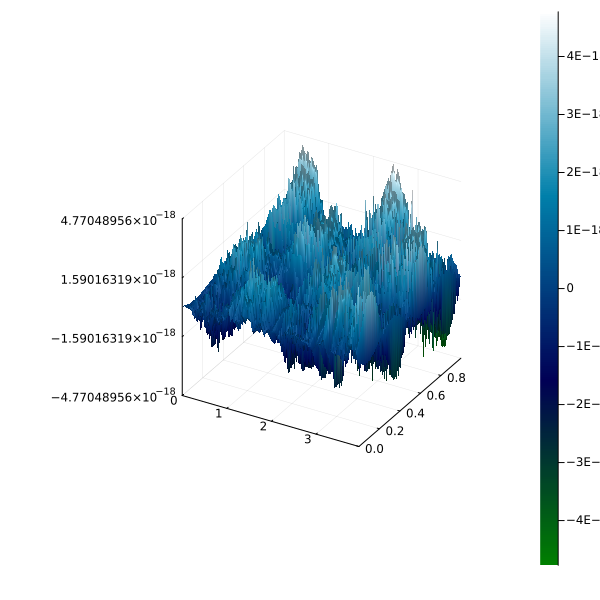

In [191]:
surface(y,x,(ϕ-ϕe)[:,:,50])

## Checking getting E in one go

### 1D

In [201]:
include("aux_functions.jl")
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
ρ = sin.(κ*ω*x) + 3. * cos.(κ*4*ω*x)
Ee = (κ *ω )^(-2)*(κ*ω*cos.(κ*ω*x) - 3.0/4/4*κ*ω*4 * sin.(κ*4*ω*x))
E = zeros(J)
E = get_E!(E,ρ,(0.0,L))

128-element Vector{Float64}:
  0.09549296585513793
  0.03308153686682976
  0.018049279694067166
  0.05678330541963174
  0.10369584207570931
  0.1024141827365012
  0.03676762938983427
 -0.05380151515597699
 -0.10816330033151861
 -0.09667488031272814
  ⋮
 -0.01709530637492293
  0.03507614845118628
  0.025778058781830364
 -0.01804773452041492
 -0.038072960202649886
  0.0024102565080326016
  0.08472793560806013
  0.15038527467260587
  0.15218078581261585

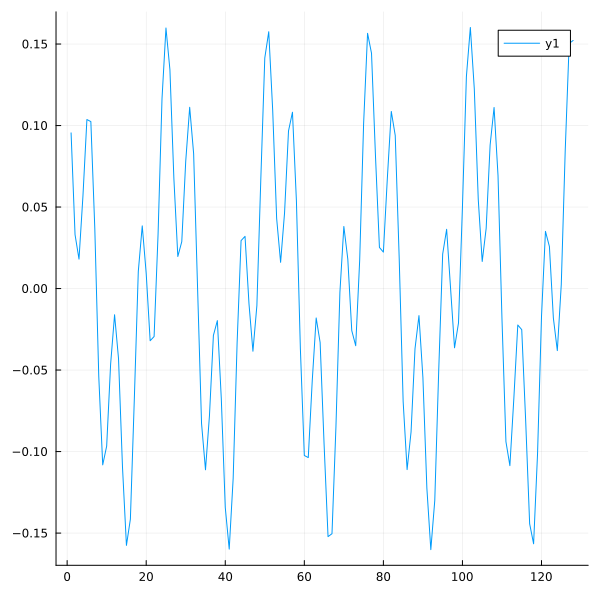

In [203]:
#plot(E-Ee)
plot(E)

### D = 2

In [215]:
include("aux_functions.jl")

J = (200,100)
Box = (0.0,1.0,0.0,2.0)
x = Box[1]:0.01:Box[2]
y = Box[3]:0.01:Box[4]

ρ = Array{Float64,2}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]

@show κ
@show k = [2,2].*κ

@show k'*k

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ρ[i,j] = sin(k[2]*(j-1)*dx[2])
    end
end

Ee = Array{Float64,3}(undef,(2,J...))

for i in 1:J[1]
    for j in 1:J[2]
        Ee[1,i,j] = k[1]*(k[1]^2 + k[2]^2)^(-1)*cos(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        Ee[2,i,j] = k[2]*(k[1]^2 + k[2]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*cos(k[2]*(j-1)*dx[2])
    end
end

E = Array{Float64,3}(undef,(2,J...))

#plot_matrix(ρ)

#surface(y[1:end],x[1:end],ρ)

#plot(x,ρ[:,25])
#length(x)

κ = [6.283185307179586, 3.141592653589793]
k = [2, 2] .* κ = [12.566370614359172, 6.283185307179586]
k' * k = 197.39208802178717


2×200×100 Array{Float64, 3}:
[:, :, 1] =
 6.92714e-310  6.92709e-310  …  6.92709e-310  0.0  0.0  5.4e-323
 0.0           0.0              2.122e-314    0.0  0.0  1.0e-323

[:, :, 2] =
 1.5e-323  3.25939e-311  3.60739e-313  0.0  …  6.92709e-310  6.92709e-310
 0.0       4.24399e-314  0.0           0.0     8.48798e-314  2.122e-314

[:, :, 3] =
 6.92709e-310  6.92709e-310  0.0  1.14e-322     …  6.92709e-310  6.92709e-310
 2.122e-314    2.122e-314    0.0  4.24399e-314     2.122e-314    2.122e-314

;;; … 

[:, :, 98] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 99] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 100] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0

In [216]:
get_E!(E,ρ,Box)

(J, κ) = ((200, 100), [6.283185307179586, 3.141592653589793])


200×100 Matrix{Float64}:
 -3.40373e-18  -3.47684e-18   2.25255e-18  …  -3.48432e-18  -3.49137e-18
  0.00199868    0.00198292    0.00193589       0.00193589    0.00198292
  0.00398948    0.00395802    0.00386414       0.00386414    0.00395802
  0.00596453    0.0059175     0.00577715       0.00577715    0.0059175
  0.00791604    0.00785362    0.00766735       0.00766735    0.00785362
  0.00983632    0.00975875    0.00952729   …   0.00952729    0.00975875
  0.0117178     0.0116254     0.0113496        0.0113496     0.0116254
  0.013553      0.0134461     0.0131272        0.0131272     0.0134461
  0.0153347     0.0152138     0.0148529        0.0148529     0.0152138
  0.0170559     0.0169214     0.0165201        0.0165201     0.0169214
  ⋮                                        ⋱                
 -0.0170559    -0.0169214    -0.0165201       -0.0165201    -0.0169214
 -0.0153347    -0.0152138    -0.0148529       -0.0148529    -0.0152138
 -0.013553     -0.0134461    -0.0131272       -0.0131272

In [217]:
norm(E-Ee)

3.71241185976361e-15

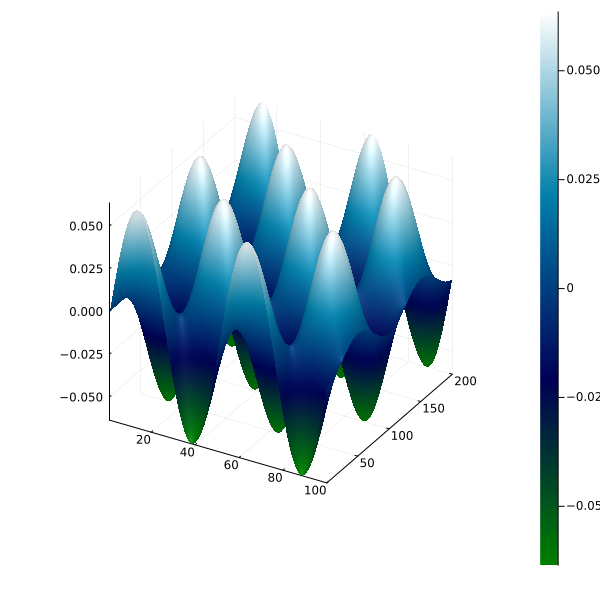

In [218]:
surface(E[1,:,:])